<a href="https://colab.research.google.com/github/DhanushN2005/EEG_Eye_State_Classification/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("/content/EEG_Eye_State_Classification.csv")

In [7]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [8]:
x=df.drop('eyeDetection',axis=1)
y=df['eyeDetection']

In [41]:
import sklearn.preprocessing
x=sklearn.preprocessing.normalize(x)
x=sklearn.preprocessing.scale(x)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=SVC(kernel='linear')

In [43]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [44]:
accuracy_score=model.score(x_test,y_test)
print(accuracy_score)

0.6568758344459279


In [45]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)

SVC()

In [46]:
accuracy_rbf=model_rbf.score(x_test,y_test)
print(accuracy_rbf)

0.9188918558077437


In [51]:
model_sig=SVC(kernel='sigmoid')
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [52]:
accuracy_sig=model_sig.score(x_test,y_test)
print(accuracy_sig)

0.44959946595460615


In [55]:
model_poly=SVC(kernel='poly')
model_poly.fit(x_train,y_train)
accuracy_poly=model_poly.score(x_test,y_test)
print(accuracy_poly)

0.8845126835781041


In [47]:
y_pred=model_rbf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1586
           1       0.95      0.88      0.91      1410

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



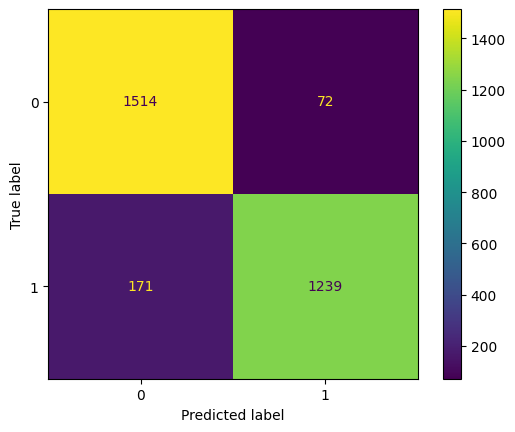

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

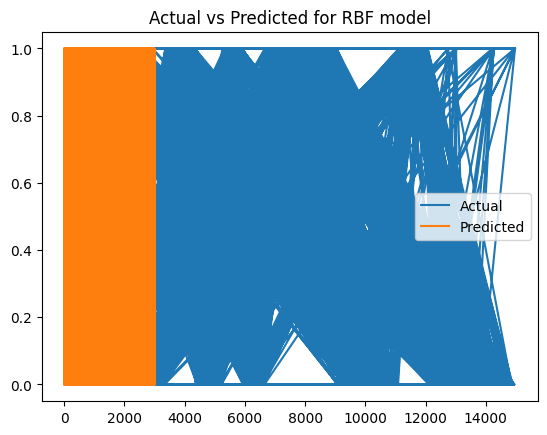

In [58]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted for RBF model')
plt.legend()
plt.show()